<a href="https://colab.research.google.com/github/svperbeast/ai_lab/blob/main/adaptive_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Adaboost

#### (1) Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

#### (2) Load dataset for implementation
###### - load PimaIndianDiabetes dataset and split

In [2]:
PimaIndiansDiabetes = pd.read_csv("/content/PimaIndiansDiabetes.csv")

PimaIndiansDiabetes_X = PimaIndiansDiabetes.drop(columns=['diabetes'])
PimaIndiansDiabetes_Y = PimaIndiansDiabetes['diabetes']

n_train = 400

dia_train_X, dia_test_X, dia_train_Y, dia_test_Y = train_test_split(PimaIndiansDiabetes_X, PimaIndiansDiabetes_Y, train_size=n_train)

In [4]:
PimaIndiansDiabetes

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,1,85,66,29,0,26.6,0.351,31,neg
2,8,183,64,0,0,23.3,0.672,32,pos
3,1,89,66,23,94,28.1,0.167,21,neg
4,0,137,40,35,168,43.1,2.288,33,pos
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,neg
764,2,122,70,27,0,36.8,0.340,27,neg
765,5,121,72,23,112,26.2,0.245,30,neg
766,1,126,60,0,0,30.1,0.349,47,pos


#### (3) Examples before initial settings

In [3]:
wgt = np.repeat(1/400, 400)

dia_rp = DecisionTreeClassifier(max_depth=30, min_samples_split=20)
dia_rp.fit(dia_train_X, dia_train_Y, sample_weight=wgt)

ci = dia_rp.predict(dia_train_X)

x = confusion_matrix(dia_train_Y, ci)
print("confusion matrix = \n", x)

x_bst = 1-np.diag(x).sum()/np.sum(x)
print("bst = ", 1-np.diag(x).sum()/np.sum(x))

confusion matrix = 
 [[229  26]
 [ 22 123]]
bst =  0.12


#### (4) Learning Adaboost

In [5]:
cit = np.array([])
ait = np.array([])
x_bst = np.array([])

iter = 20

for i in range(0,iter):
    dia_rp = DecisionTreeClassifier(max_depth=30, min_samples_split=20)
    dia_rp.fit(dia_train_X, dia_train_Y, sample_weight=wgt)

    ci = dia_rp.predict(dia_train_X)
    cit = np.append(cit, ci).reshape(i+1,-1)

    x = confusion_matrix(dia_train_Y, ci)
    x_bst = np.append(x_bst, 1-np.diag(x).sum()/np.sum(x))

    ai = 0.5 * np.log(wgt[ci == dia_train_Y].sum()/wgt[ci != dia_train_Y].sum())
    ait = np.append(ait, ai)

    zt = np.sum(wgt * np.exp(-ai * np.sign(1*np.array(ci == dia_train_Y)-0.5)))
    wgt = wgt * np.exp(-ai * np.sign(1*np.array(ci == dia_train_Y)-0.5)) / zt

    print("iteration ", i+1, " : ", x_bst[i], " ", ai)

iteration  1  :  0.12   0.996215082345103
iteration  2  :  0.1775   1.0938952725514302
iteration  3  :  0.16500000000000004   1.0867311153271444
iteration  4  :  0.20750000000000002   1.0342581410266736
iteration  5  :  0.24   1.0504233989797869
iteration  6  :  0.20750000000000002   1.1265530169765363
iteration  7  :  0.18500000000000005   1.1010446209974372
iteration  8  :  0.17500000000000004   1.1668453019386429
iteration  9  :  0.18500000000000005   1.1832947330099135
iteration  10  :  0.20499999999999996   1.2523529864242537
iteration  11  :  0.255   1.0641249143549423
iteration  12  :  0.18999999999999995   1.217193773845012
iteration  13  :  0.18999999999999995   1.3371096511305736
iteration  14  :  0.1875   1.171207321439288
iteration  15  :  0.245   1.0750294573249113
iteration  16  :  0.21499999999999997   1.130310772463993
iteration  17  :  0.23750000000000004   1.2484347041389474
iteration  18  :  0.22499999999999998   1.454141502463571
iteration  19  :  0.1875   1.1042385

#### (5) Prediction of Adaboost

In [10]:
cit = np.sign(1*(cit == 'pos')-0.5)

In [7]:
pred = np.array([])
for i in range(0,iter):
    x = 0
    for j in range(0,i+1):
        x = x + ait[j]*cit[j,:]
    # print(x)
    pred = np.append(pred, x)

pred = np.sign(pred.reshape(iter,-1))

print(pred)

y_bst = np.array([])
dia_train_Y_tmp = np.sign(1*(dia_train_Y=='pos')-0.5)
for i in range(0,iter):
    x = confusion_matrix(dia_train_Y_tmp, pred[i,:])
    print(1-np.diag(x).sum()/np.sum(x))
    y_bst = np.append(y_bst, 1-np.diag(x).sum()/np.sum(x))


[[ 1. -1. -1. ... -1.  1.  1.]
 [ 1.  1. -1. ...  1.  1.  1.]
 [ 1. -1. -1. ...  1.  1.  1.]
 ...
 [ 1. -1. -1. ...  1.  1.  1.]
 [ 1. -1. -1. ...  1.  1.  1.]
 [ 1. -1. -1. ...  1.  1.  1.]]
0.12
0.1775
0.025000000000000022
0.04249999999999998
0.0
0.0050000000000000044
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


### (6) Plotting

##### - Error from each boosting iterations

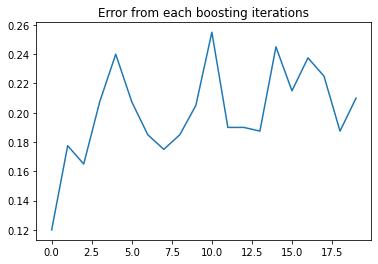

In [11]:
plt.plot(range(0,iter), x_bst)
plt.title('Error from each boosting iterations')
plt.show()

##### - Error arising from averaging predictions

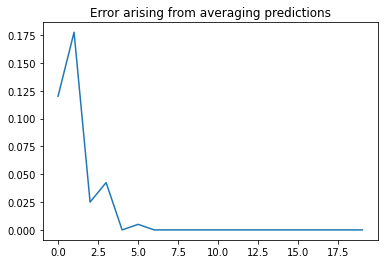

In [12]:
plt.plot(range(0,iter), y_bst)
plt.title("Error arising from averaging predictions")
plt.show()

### (7) Using sklearn.ensemble package

In [13]:
from sklearn.ensemble import AdaBoostClassifier

phishing = pd.read_csv(filepath_or_buffer= "/content/phishing.csv")

phishing_X = phishing.drop(columns=['Y'])
phishing_Y = phishing['Y']

train_X, test_X, train_Y, test_Y = train_test_split(phishing_X, phishing_Y, train_size=0.7)

adaboost = AdaBoostClassifier(n_estimators=50)
adaboost.fit(train_X, train_Y)

pred_tr = adaboost.predict(train_X)
x_tr = confusion_matrix(train_Y, pred_tr)
print("confusion matrix for train set = \n",x_tr)
print("Acc = ", np.diag(x_tr).sum()/np.sum(x_tr))

pred_ts = adaboost.predict(test_X)
x_ts = confusion_matrix(test_Y, pred_ts)
print("confusion matrix for test set = \n",x_ts)
print("Acc = ", np.diag(x_ts).sum()/np.sum(x_ts))

confusion matrix for train set = 
 [[454  35]
 [ 54 403]]
Acc =  0.9059196617336153
confusion matrix for test set = 
 [[200  13]
 [ 25 168]]
Acc =  0.9064039408866995
